In [255]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migraine-classification/data.csv


In [256]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [257]:
data = pd.read_csv('/kaggle/input/migraine-classification/data.csv')
df = pd.read_csv('/kaggle/input/migraine-classification/data.csv')

In [258]:
data.shape

(400, 24)

In [259]:
print('Number of training examples: %s' %str (data.shape [0]))
print('Number of features: %s' %str (data.shape [1]))

Number of training examples: 400
Number of features: 24


In [260]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [261]:
data['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

In [262]:
data.Age.min() , data.Age.max()

(15, 77)

# ***Visualisation***

In [263]:
# data['Age'].value_counts()

<AxesSubplot:title={'center':'Range of Patient Age'}>

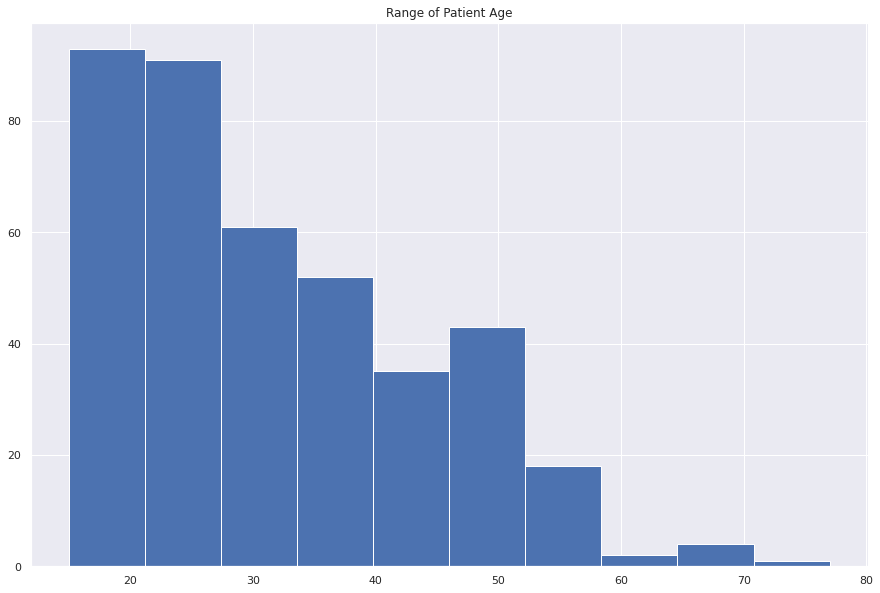

In [264]:
plt.title('Range of Patient Age')
data['Age'].hist()

In [265]:
data.Character.value_counts()

1    369
0     20
2     11
Name: Character, dtype: int64

<AxesSubplot:xlabel='Character', ylabel='count'>

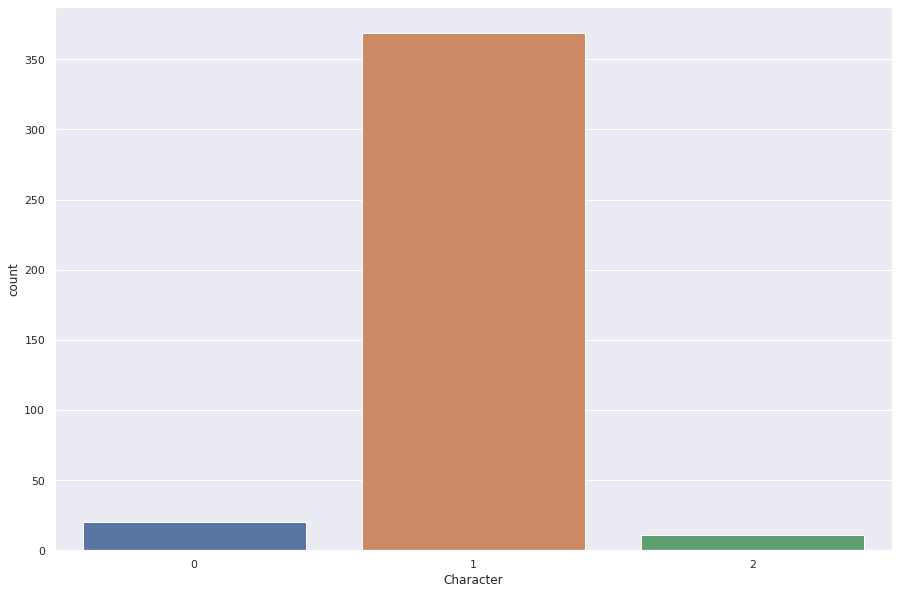

In [266]:
sns.countplot(x=data['Character'])

<AxesSubplot:xlabel='Defect', ylabel='count'>

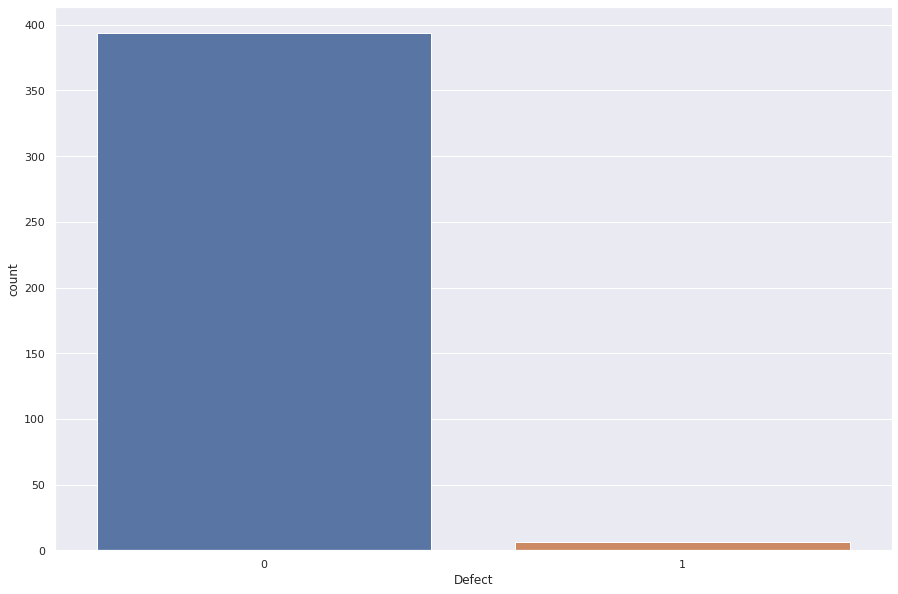

In [267]:
sns.countplot(x=data.Defect)

In [268]:
data.Type.value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

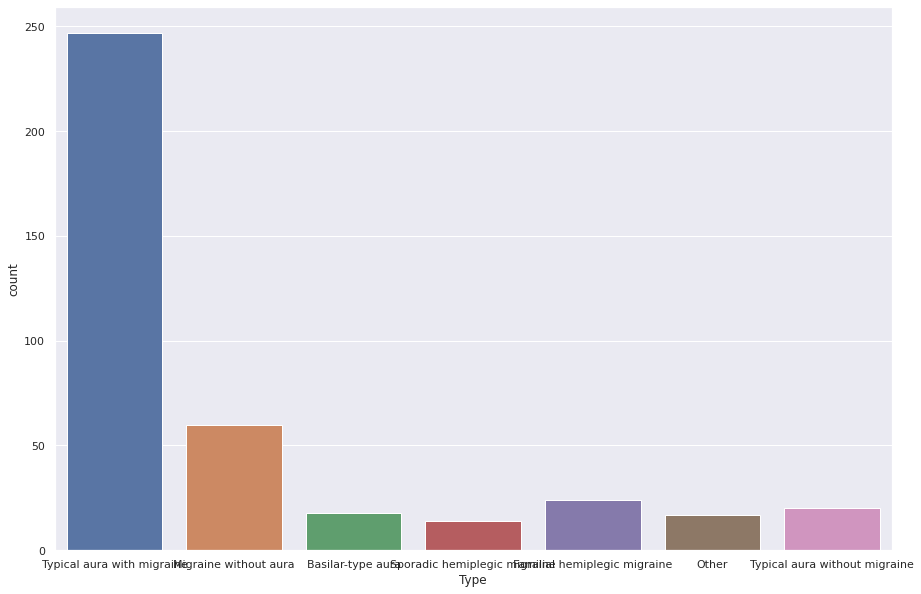

In [269]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(x=data.Type)

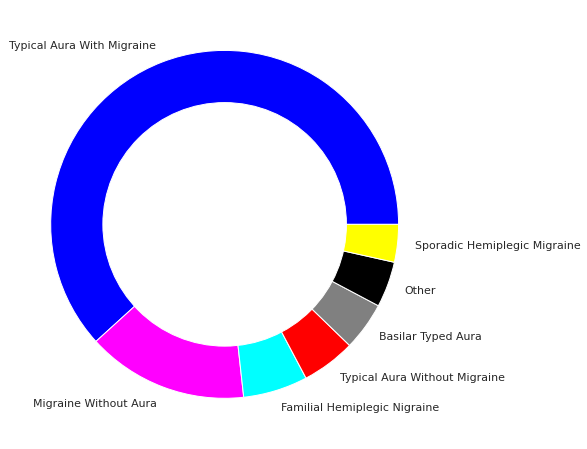

In [270]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

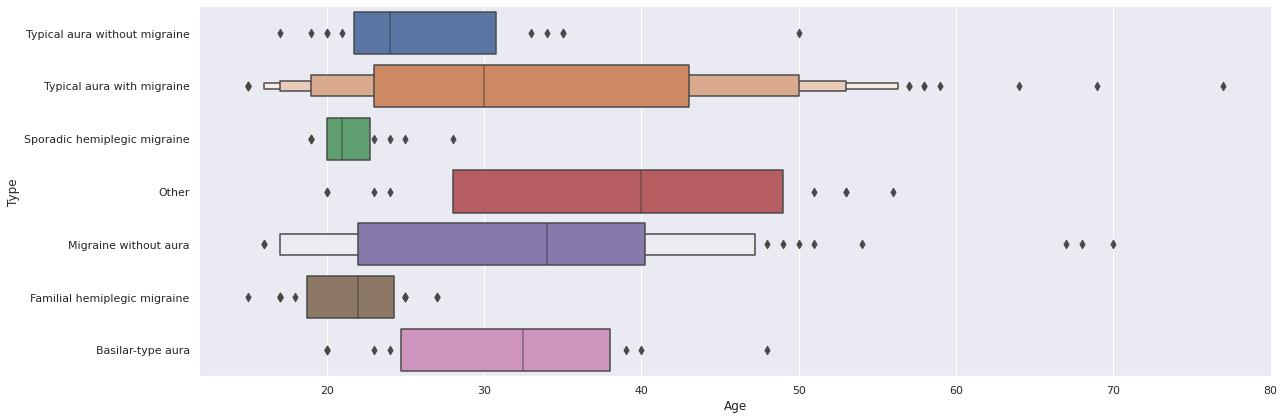

In [271]:

sns.catplot(y='Type', x='Age', data=data.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

In [272]:
data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [273]:
#dataframes

In [274]:
data_1 = data[data['Type'] == 'Typical aura with migraine']
data_2 = data[data['Type'] == 'Migraine without aura']
data_3 = data[data['Type'] == 'Familial hemiplegic migraine']
data_4 = data[data['Type'] == 'Typical aura without migraine']
data_5 = data[data['Type'] == 'Basilar-type aura']
data_6 = data[data['Type'] == 'Other']
data_7 = data[data['Type'] == 'Sporadic hemiplegic migraine']

In [275]:
data.shape

(400, 24)

In [276]:
400/7

57.142857142857146

In [277]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=200, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=200, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=200, 
                           random_state=123, replace=True)

In [278]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample, 
                          data_5_resample, data_6_resample, data_7_resample])

In [279]:
train_dataset.head(3)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [280]:
train_dataset.shape

(1447, 24)

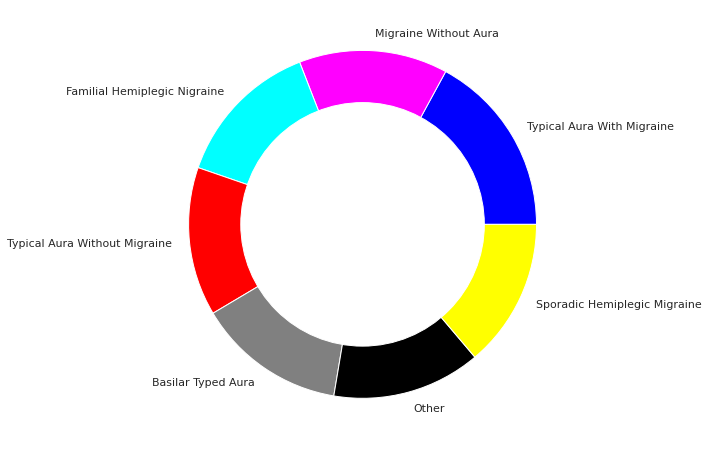

In [281]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

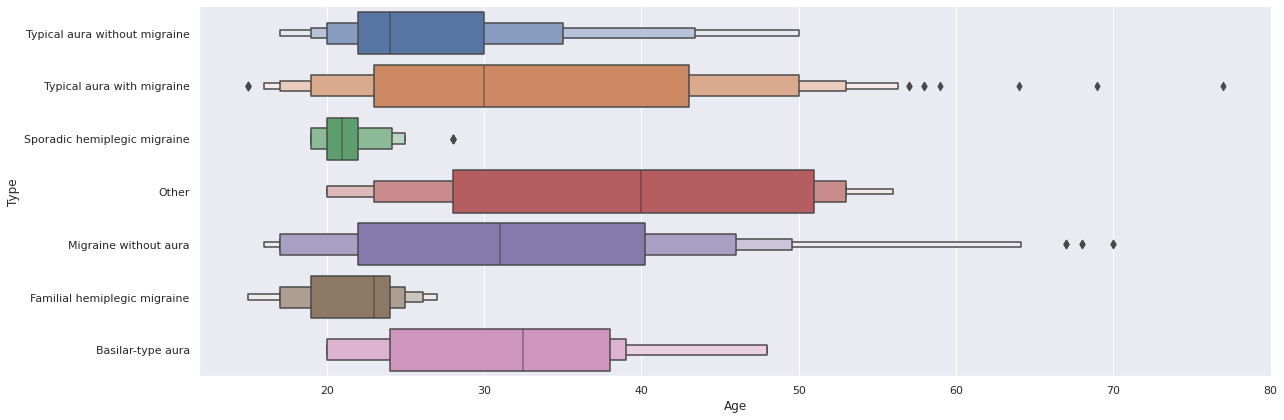

In [282]:
sns.catplot(y='Type', x='Age', data=train_dataset.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

# ***Testing and Splitting Data***

In [283]:
X = train_dataset.drop('Type', axis=1)
Y = train_dataset['Type']

In [284]:
X.shape , Y.shape

((1447, 23), (1447,))

In [285]:
X.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [286]:
Y.head(5)

0    Typical aura with migraine
1    Typical aura with migraine
2    Typical aura with migraine
3    Typical aura with migraine
4    Typical aura with migraine
Name: Type, dtype: object

In [287]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
(1157, 23)
(290, 23)
(1157,)
(290,)

(1157, 23)
(290, 23)
(1157,)
(290,)


(290,)

In [288]:
X_arr = np.array(X)
X_arr.shape, X.shape

((1447, 23), (1447, 23))

In [289]:
X_arr

array([[30,  1,  5, ...,  0,  0,  0],
       [50,  3,  5, ...,  0,  0,  0],
       [53,  2,  1, ...,  0,  0,  0],
       ...,
       [21,  1,  1, ...,  0,  0,  0],
       [19,  1,  2, ...,  0,  0,  0],
       [24,  1,  1, ...,  0,  0,  0]])

In [290]:
from sklearn.preprocessing import LabelEncoder

In [291]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [292]:
labelled_Y = to_categorical(encoded_Y)

In [293]:
n_classes = len(np.unique(Y))

In [294]:
labelled_Y.shape

(1447, 7)

In [295]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                  labelled_Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1157, 23)
(290, 23)
(1157, 7)
(290, 7)


# ***Models***

****DNN****

In [296]:
def naural_natwork():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X_arr.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [297]:
model= naural_natwork()

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


callback = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)



model.fit(X_train, Y_train, 
          epochs=100, 
          validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 13ms/step - loss: 1.8482 - accuracy: 0.3068 - val_loss: 1.3911 - val_accuracy: 0.4586
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 1.1725 - accuracy: 0.5972 - val_loss: 0.9590 - val_accuracy: 0.7138
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 0.8099 - accuracy: 0.7226 - val_loss: 0.6790 - val_accuracy: 0.7690
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 0.5852 - accuracy: 0.8194 - val_loss: 0.4857 - val_accuracy: 0.8345
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 0.4028 - accuracy: 0.8773 - val_loss: 0.4478 - val_accuracy: 0.8655
Epoch 6/100
37/37 [==============================] - 0s 7ms/step - loss: 0.3467 - accuracy: 0.8790 - val_loss: 0.3277 - val_accuracy: 0.8931
Epoch 7/100
37/37 [==============================] - 0s 7ms/step - loss: 0.2919 - accuracy: 0.8980 - val_loss: 0.3126 - val_accuracy: 0.8862
Epoch 8/100


In [298]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               12288     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 903       
Total params: 177,415
Trainable params: 177,415
Non-trainable params: 0
_________________________________________________________________


In [299]:
hist= model.history.history

In [300]:
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [301]:
acc, val_acc = hist['accuracy'], hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']

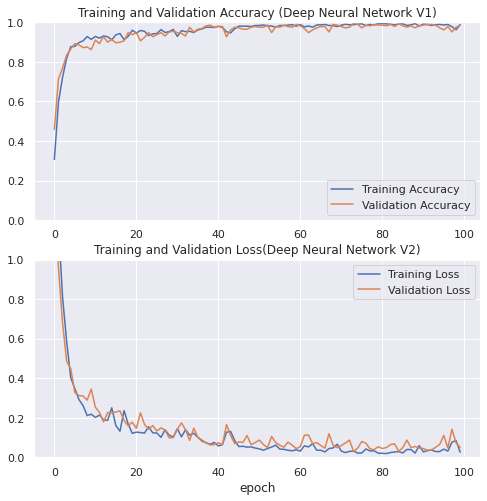

In [302]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V1)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss(Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [303]:
def neural_network_2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_arr.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [304]:
model_2 = neural_network_2()
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               6144      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 7)                 455       
Total params: 47,751
Trainable params: 47,751
Non-trainable params: 0
_________________________________________________________________


In [305]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy', 
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model_2.fit(X_train, Y_train, 
          epochs=100, 
          validation_data=(X_test, Y_test), 
          verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 13ms/step - loss: 1.8571 - accuracy: 0.2973 - val_loss: 1.4074 - val_accuracy: 0.5517
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 1.2671 - accuracy: 0.5851 - val_loss: 1.0321 - val_accuracy: 0.5862
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 0.8955 - accuracy: 0.7087 - val_loss: 0.7695 - val_accuracy: 0.7138
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.7822 - val_loss: 0.5594 - val_accuracy: 0.8483
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5136 - accuracy: 0.8444 - val_loss: 0.4905 - val_accuracy: 0.8552
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8591 - val_loss: 0.5753 - val_accuracy: 0.7966
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.3819 - accuracy: 0.8660 - val_loss: 0.3489 - val_accuracy: 0.8931
Epoch 8/100


In [306]:
hist_2 = model_2.history.history

In [307]:
acc_2, val_acc_2 = hist_2['accuracy'], hist_2['val_accuracy']
loss_2 = hist_2['loss']
val_loss_2 = hist_2['val_loss']

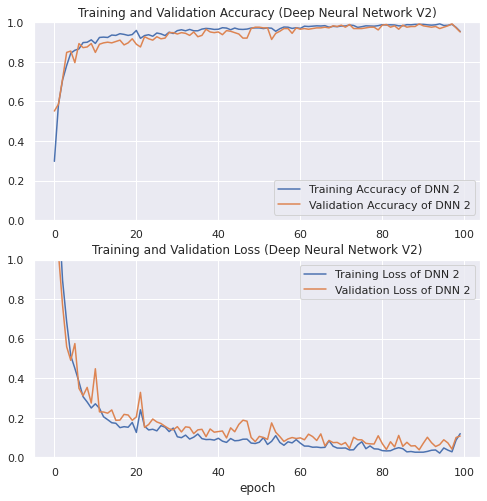

In [308]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_2, label='Training Accuracy of DNN 2')
plt.plot(val_acc_2, label='Validation Accuracy of DNN 2')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V2)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss_2, label='Training Loss of DNN 2')
plt.plot(val_loss_2, label='Validation Loss of DNN 2')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [309]:
# evaluate the model
score = model.evaluate(X_test, Y_test)
score_2 = model_2.evaluate(X_test, Y_test)

# print accuracies of models 
print("%s: %.2f%%" % (model.metrics_names[1], score[1] * 100))
print('Accuracy of First Deep Neural Network: %.2f' % (score[1]*100))
print('Loss of First Deep Neural Network: %.4f' % (score[0]))

print('')

print("%s: %.2f%%" % (model_2.metrics_names[1], score_2[1] * 100))
print('Accuracy of Second Deep Neural Network: %.2f' % (score_2[1]*100))
print('Loss of Second Deep Neural Network: %.4f' % (score_2[0]))

10/10 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9517
accuracy: 98.62%
Accuracy of First Deep Neural Network: 98.62
Loss of First Deep Neural Network: 0.0505

accuracy: 95.17%
Accuracy of Second Deep Neural Network: 95.17
Loss of Second Deep Neural Network: 0.1074


In [310]:
# evaluate the model
score = model.evaluate(X_test, Y_test)
score_2 = model_2.evaluate(X_test, Y_test)

# print accuracies of models 
print("%s: %.2f%%" % (model.metrics_names[1], score[1] * 100))
print('Accuracy of First Deep Neural Network: %.2f' % (score[1]*100))
print('Loss of First Deep Neural Network: %.4f' % (score[0]))

print('')

print("%s: %.2f%%" % (model_2.metrics_names[1], score_2[1] * 100))
print('Accuracy of Second Deep Neural Network: %.2f' % (score_2[1]*100))
print('Loss of Second Deep Neural Network: %.4f' % (score_2[0]))

10/10 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9517
accuracy: 98.62%
Accuracy of First Deep Neural Network: 98.62
Loss of First Deep Neural Network: 0.0505

accuracy: 95.17%
Accuracy of Second Deep Neural Network: 95.17
Loss of Second Deep Neural Network: 0.1074


In [311]:
y_hat_nn1 = model.predict(X_test)
pred_nn1 = np.argmax(model.predict(X_test), axis=1)
Y_test_class_1 = np.argmax(Y_test, axis=1)

In [312]:
print('Classification Report of Deep Neural Network 1')
print(classification_report(Y_test_class_1, pred_nn1))

Classification Report of Deep Neural Network 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.89      1.00      0.94        31
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        36
           5       1.00      0.92      0.96        52
           6       1.00      1.00      1.00        43

    accuracy                           0.99       290
   macro avg       0.98      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290



In [313]:
# classification report of second neural network
y_hat_nn2 = model_2.predict(X_test)
pred_nn2 = np.argmax(model_2.predict(X_test), axis=1)
Y_test_class_2 = np.argmax(Y_test, axis=1)
from sklearn.metrics import precision_recall_curve
predicted_probabilities = model_2.predict(X_test)
true_labels = np.argmax(Y_test, axis=1)

In [314]:
from sklearn.metrics import precision_recall_curve, auc
precision = dict()
recall = dict()
pr_auc = dict()
n_classes = len(np.unique(true_labels))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        (true_labels == i).astype(int), predicted_probabilities[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    precision["micro"], recall["micro"], _ = precision_recall_curve(
    np.array(Y_test).ravel(), predicted_probabilities.ravel())
pr_auc["micro"] = auc(recall["micro"], precision["micro"])

In [315]:
print('Classification Report of Deep Neural Network 2')
print(classification_report(Y_test_class_2, pred_nn2))

Classification Report of Deep Neural Network 2
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        47
           1       0.91      1.00      0.95        31
           2       0.93      1.00      0.96        40
           3       1.00      0.93      0.96        41
           4       0.84      1.00      0.91        36
           5       1.00      0.90      0.95        52
           6       1.00      1.00      1.00        43

    accuracy                           0.95       290
   macro avg       0.95      0.96      0.95       290
weighted avg       0.96      0.95      0.95       290



In [316]:
DNN_Accuracy = score_2[1]
DNN_Precision = precision_score(Y_test_class_2, pred_nn2,average = "macro")
DNN_Recall = recall_score(Y_test_class_2, pred_nn2,average = "macro")
DNN_F1 = f1_score(Y_test_class_2, pred_nn2,average = "macro")
print('accuracy',DNN_Accuracy)
print("Precision Score : ",DNN_Precision)
print("Recall Score :" , DNN_Recall)
print("F1 Score :" , DNN_F1)

accuracy 0.951724112033844
Precision Score :  0.9507710060768494
Recall Score : 0.9575736925243932
F1 Score : 0.9517089373076543


In [317]:
from sklearn.metrics import roc_curve, auc

In [318]:
n_classes = Y_train.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_hat_nn2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [319]:
fpr["macro"], tpr["macro"], _ = roc_curve(Y_test.ravel(), y_hat_nn2.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

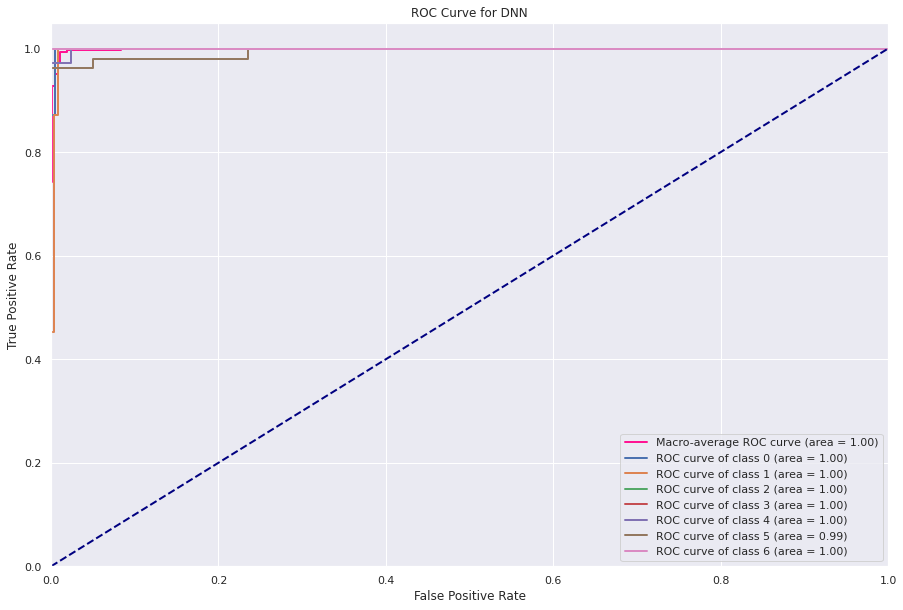

In [320]:
plt.figure()
lw = 2
plt.plot(fpr["macro"], tpr["macro"], color='deeppink',
         lw=lw, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DNN')
plt.legend(loc="lower right")
plt.show()

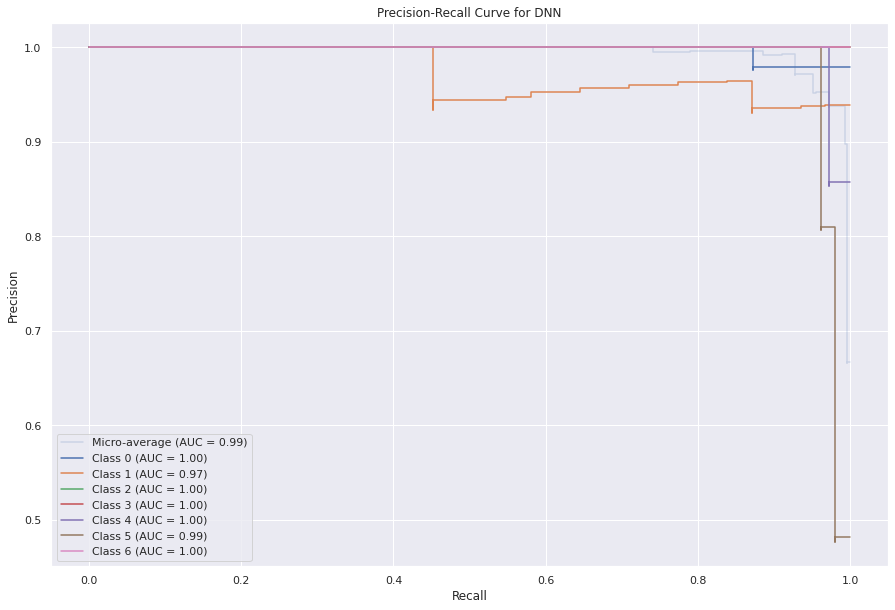

In [321]:
# Plot the PR curves for each class
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post', label='Micro-average (AUC = {0:0.2f})'
               ''.format(pr_auc["micro"]))
for i in range(n_classes):
    plt.step(recall[i], precision[i], where='post',
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, pr_auc[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for DNN')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [322]:
x=df.drop(['Type'],1)
y=df['Type'].copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [323]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [324]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(xtrain)
X_test_scale = scaler.transform(xtest)

 ****KNN****

accuracy 0.8375
Precision Score :  0.6893424036281178
Recall Score : 0.5119047619047619
F1 Score : 0.5434782608695652


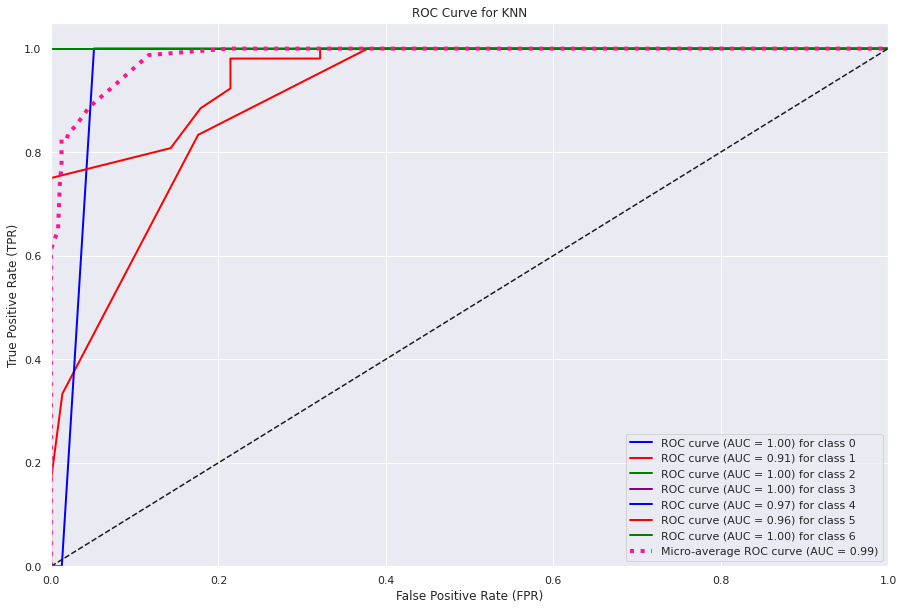

In [325]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from itertools import cycle
from sklearn.metrics import roc_curve

kRange = range(1,15,1)
scores_list = []
pr_curve_dict = {}
for i in kRange:
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scale,ytrain)
    ypredr = knn.predict(X_test_scale)
Acc_KNN=accuracy_score(ypredr, ytest)
Pre_KNN = precision_score(ytest, ypredr,average = "macro")
Rec_KNN = recall_score(ytest, ypredr, average = "macro")
F1_KNN = f1_score(ytest, ypredr, average = "macro")
print('accuracy',Acc_KNN)
print("Precision Score : ",Pre_KNN)
print("Recall Score :" , Rec_KNN)
print("F1 Score :" , F1_KNN )

y_scores = knn.predict_proba(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 1.00


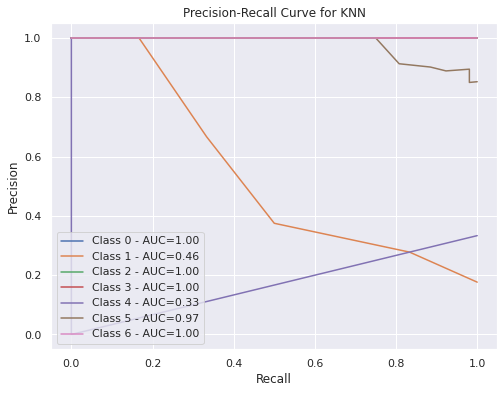

In [326]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = knn.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

****DecisionTreeClassifier****

accuracy 0.8
Precision Score :  0.584453781512605
Recall Score : 0.5961538461538461
F1 Score : 0.525629608000584


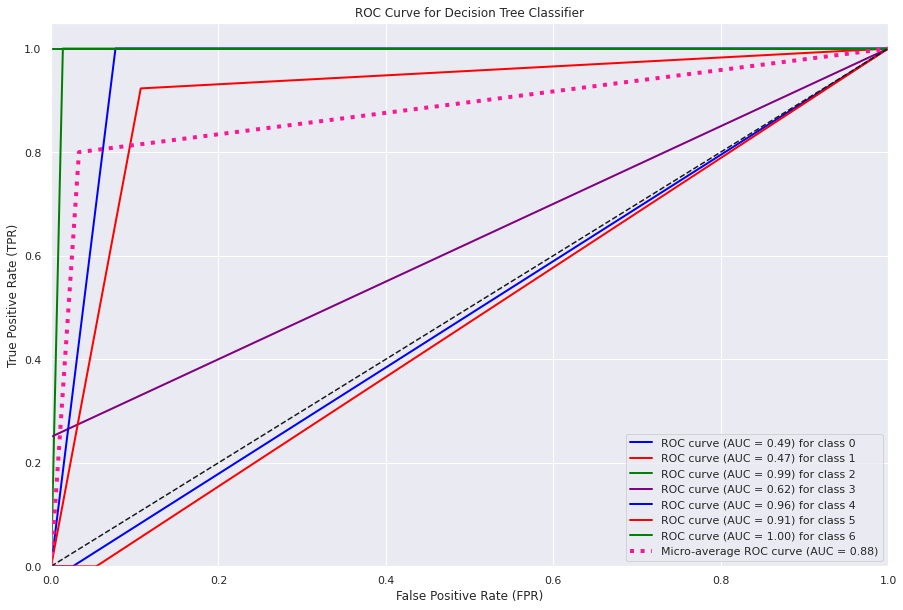

In [334]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
dtr = DecisionTreeClassifier(random_state=32)
dtr.fit(X_train_scale, ytrain)
ypreddtf = dtr.predict(X_test_scale)
Acc_DTC=accuracy_score(ypreddtf, ytest)
Pre_DTC = precision_score(ytest, ypreddtf ,average = "macro")
Rec_DTC = recall_score(ytest, ypreddtf , average = "macro")
F1_DTC = f1_score(ytest, ypreddtf , average = "macro")
print('accuracy',Acc_DTC)
print("Precision Score : ",Pre_DTC)
print("Recall Score :" , Rec_DTC)
print("F1 Score :" , F1_DTC)
y_scores = dtr.predict_proba(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 1.00


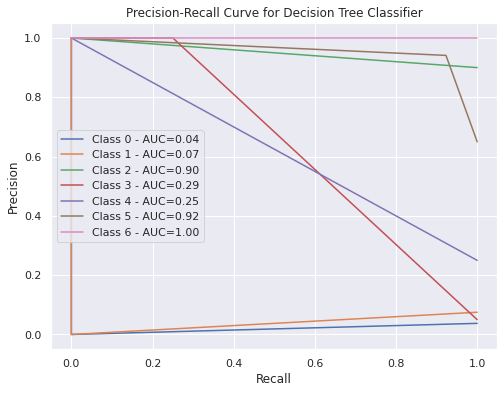

In [331]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = dtr.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

****MLPClassifier****

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


accuracy 0.95
Precision Score :  0.9563492063492064
Recall Score : 0.9139194139194139
F1 Score : 0.9252214093184443


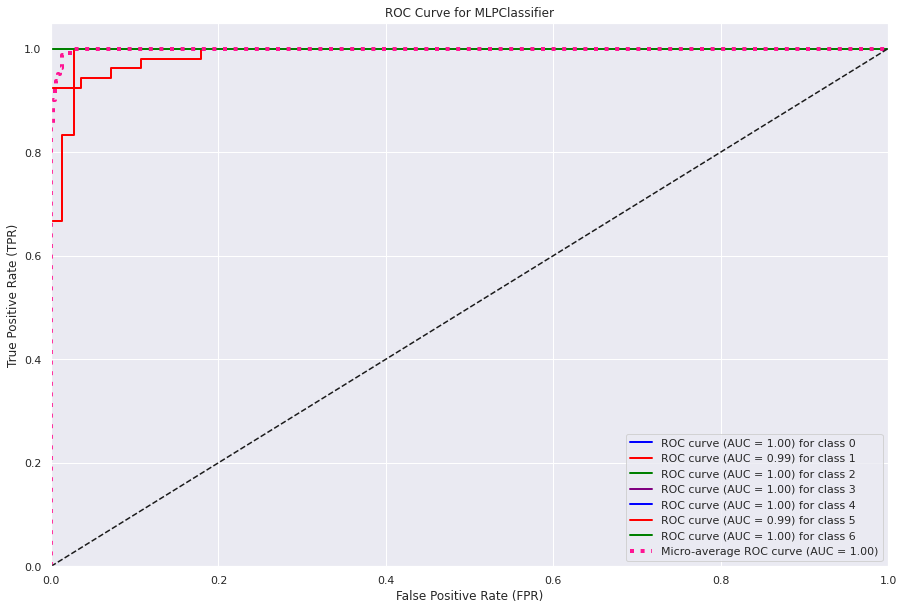

In [333]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
mlp=MLPClassifier()
mlp.fit(X_train_scale, ytrain)
ypredmlp = mlp.predict(X_test_scale)
Acc_mlp=accuracy_score(ypredmlp,ytest )
Pre_mlp = precision_score(ytest, ypredmlp ,average = "macro")
Rec_mlp = recall_score(ytest, ypredmlp , average = "macro")
F1_mlp = f1_score(ytest, ypredmlp , average = "macro")
print('accuracy',Acc_mlp)
print("Precision Score : ",Pre_mlp)
print("Recall Score :" ,Rec_mlp )
print("F1 Score :" ,F1_mlp )

y_scores = mlp.predict_proba(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLPClassifier')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 1.00


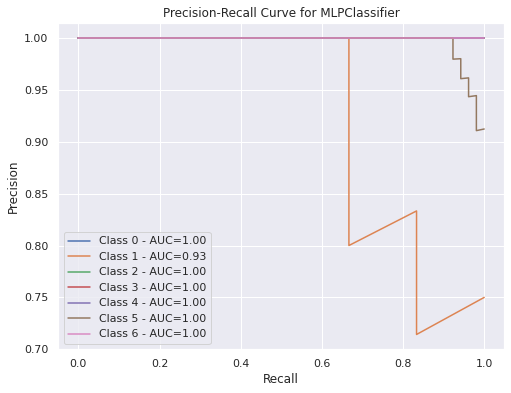

In [335]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = mlp.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for MLPClassifier')
plt.legend()
plt.grid(True)
plt.show()

****SVM****

accuracy 0.95
Precision Score :  0.9563492063492064
Recall Score : 0.9258241758241759
F1 Score : 0.9265819535361314


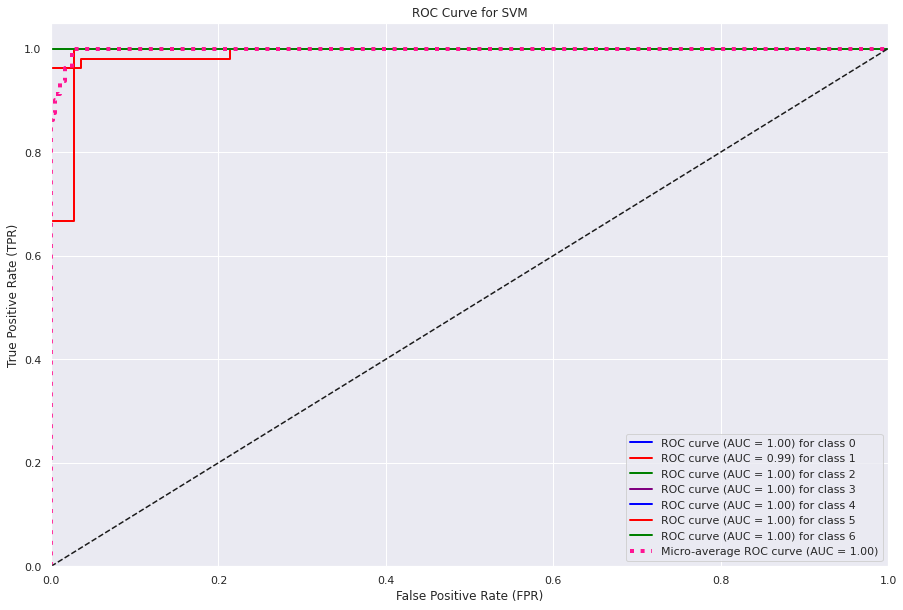

In [336]:
from sklearn import svm
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
clf = svm.SVC(kernel='linear', C = 1.0, probability=True)
clf.fit(X_train_scale, ytrain)
ypredclf = clf.predict(X_test_scale)
Acc_clf=accuracy_score(ytest,ypredclf)
Pre_clf = precision_score(ytest, ypredclf ,average = "macro")
Rec_clf = recall_score(ytest, ypredclf , average = "macro")
F1_clf = f1_score(ytest, ypredclf , average = "macro")
print('accuracy',Acc_clf)
print("Precision Score : ",Pre_clf)
print("Recall Score :" , Rec_clf)
print("F1 Score :" , F1_clf)

y_scores = clf.predict_proba(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 1.00


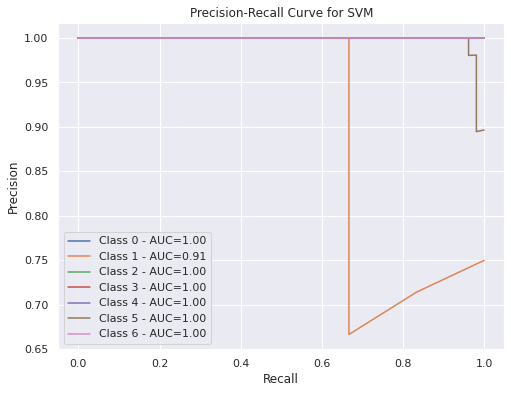

In [337]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = clf.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx] , y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()

****Random Forest****

accuracy 0.875
Precision Score :  0.7350877192982457
Recall Score : 0.6428571428571429
F1 Score : 0.6597376468694672


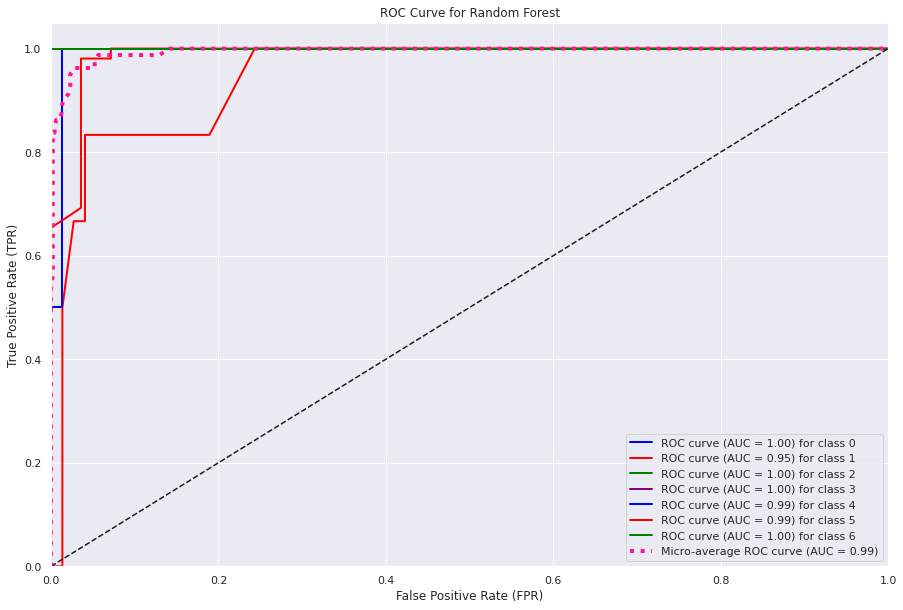

In [338]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
rfr = RandomForestClassifier(random_state= 32)
rfr.fit(X_train_scale, ytrain)
ypredrfr = rfr.predict(X_test_scale)
Acc_RF=accuracy_score(ypredrfr,ytest)
Pre_RF = precision_score(ytest, ypredrfr ,average = "macro")
Rec_RF = recall_score(ytest, ypredrfr , average = "macro")
F1_RF = f1_score(ytest, ypredrfr , average = "macro")
print('accuracy',Acc_RF)
print("Precision Score : ",Pre_RF)
print("Recall Score :" , Rec_RF)
print("F1 Score :" , F1_RF)

y_scores = rfr.predict_proba(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 1.00


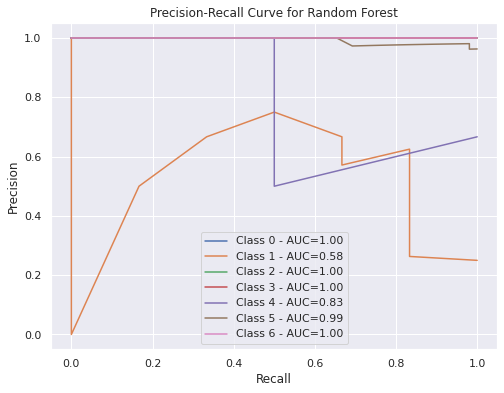

In [339]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = rfr.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

****MLP With GridSearch****

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy 0.825
Precision Score :  0.5835714285714285
Recall Score : 0.6913919413919415
F1 Score : 0.6150302226153619


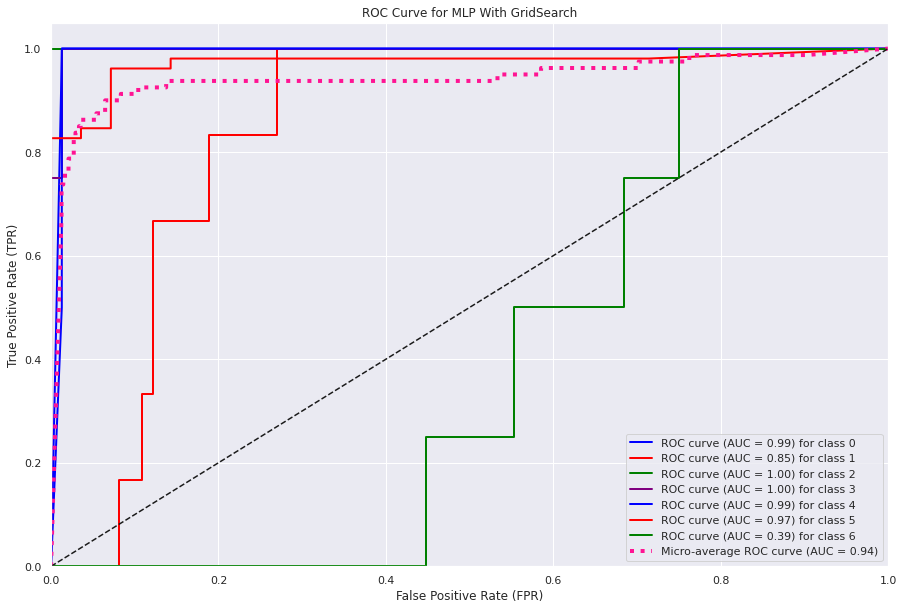

In [340]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
param_grid = {
        'hidden_layer_sizes': [(7, 7), (128,), (128, 7)],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }
estimator = GridSearchCV(
        MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)
estimator.fit(X_train_scale, ytrain)
grid_predictions = estimator.predict(X_test_scale)
Acc_grid_mlp=accuracy_score(grid_predictions,ytest)
Pre_grid_mlp=precision_score(ytest, grid_predictions ,average = "macro")
Rec_grid_mlp=recall_score(ytest, grid_predictions , average = "macro")
F1_grid_mlp=f1_score(ytest, grid_predictions , average = "macro")
print('accuracy',Acc_grid_mlp)
print("Precision Score : ",Pre_grid_mlp)
print("Recall Score :" , Rec_grid_mlp)
print("F1 Score :" , F1_grid_mlp)
y_scores = estimator.predict_proba(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLP With GridSearch')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 0.05


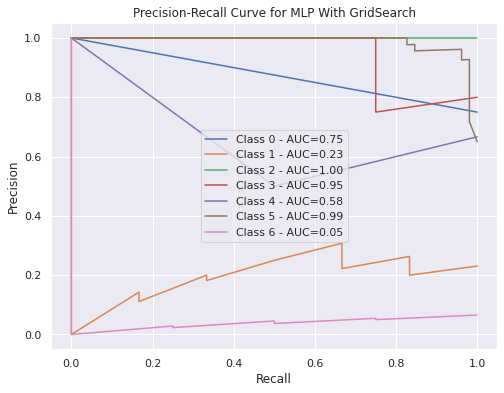

In [341]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = estimator.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for MLP With GridSearch')
plt.legend()
plt.grid(True)
plt.show()

****SVC With Gridsearch****

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

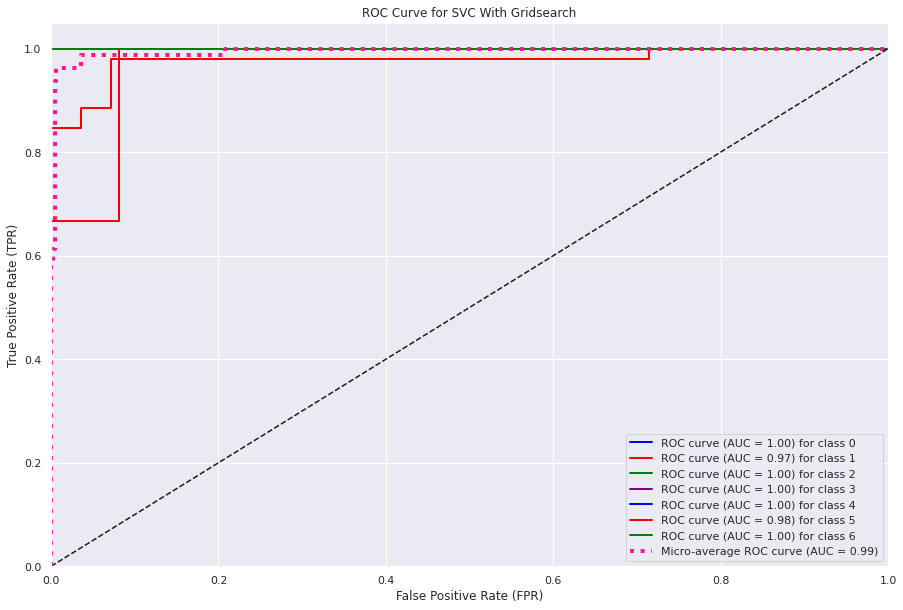

In [342]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
# grida = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grida = GridSearchCV(svm.SVC(kernel='rbf', probability=True), param_grid, refit=True, verbose=2)
grida.fit(X_train_scale,ytrain)
grid_predictions = grida.predict(X_test_scale)
Acc_grid_scv=accuracy_score(grid_predictions,ytest)
Pre_grid_scv = precision_score(ytest, grid_predictions ,average = "macro")
Rec_grid_scv = recall_score(ytest, grid_predictions , average = "macro")
F1_grid_scv = f1_score(ytest, grid_predictions , average = "macro")
print('accuracy',Acc_grid_scv)
print("Precision Score : ",Pre_grid_scv)
print("Recall Score :" , Rec_grid_scv)
print("F1 Score :" , F1_grid_scv)

decision_scores = grida.decision_function(X_test_scale)
y_test_bin = label_binarize(ytest, classes=np.unique(ytrain))
fpr = dict()
tpr = dict()
auc_score = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), decision_scores.ravel())
auc_score["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (AUC = {:.2f}) for class {}'.format(auc_score[i], i))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {:.2f})'.format(auc_score["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVC With Gridsearch')
plt.legend(loc='lower right')
plt.show()

Class 6: Mean AUC = 1.00


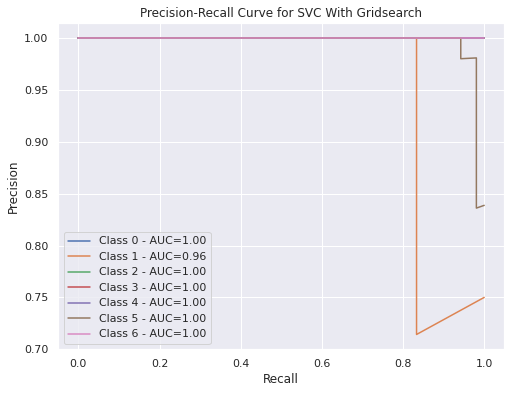

In [343]:
    pr_curve_dict = {}
    precision = dict()
    recall = dict()
    average_precision = dict()
    y_scores = grida.predict_proba(X_test_scale)
    
    for class_idx in range(len(np.unique(ytrain))):
        precision[class_idx], recall[class_idx], _ = precision_recall_curve(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
        average_precision[class_idx] = average_precision_score(
            y_test_bin[:, class_idx], y_scores[:, class_idx])
    
    scores_list.append(average_precision)
    pr_curve_dict[i] = {'precision': precision, 'recall': recall}

for class_idx in range(len(np.unique(ytrain))):
     auc_scores = []
    for k, pr_curve in pr_curve_dict.items():
        auc = average_precision[class_idx]
        auc_scores.append(auc)
    print("Class {}: Mean AUC = {:.2f}".format(class_idx, np.mean(auc_scores)))
    # Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

for class_idx in range(len(np.unique(ytrain))):
     for k, pr_curve in pr_curve_dict.items():
        precision = pr_curve['precision'][class_idx]
        recall = pr_curve['recall'][class_idx]
        plt.plot(recall, precision, label='Class {} - AUC={:.2f}'.format(class_idx, average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVC With Gridsearch')
plt.legend()
plt.grid(True)
plt.show()

In [345]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier','support vector classifier','svc with gridsearch','mlp with gridsearch','DNN'] ,
    'Accuracy Score': [Acc_RF, Acc_mlp, 
              Acc_KNN, Acc_DTC,Acc_clf,Acc_grid_scv,Acc_grid_mlp,DNN_Accuracy ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
5,svc with gridsearch,0.962500
7,DNN,0.951724
1,MLPClassifier,0.950000
4,support vector classifier,0.950000
0,Random Forest,0.875000
2,KNeighborsClassifier,0.837500
6,mlp with gridsearch,0.825000
3,DecisionTreeClassifier,0.800000


In [346]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier','support vector classifier','svc with gridsearch','mlp with gridsearch','DNN'] ,
    'Precision Score': [Pre_RF, Pre_mlp, 
              Pre_KNN, Pre_DTC,Pre_clf,Pre_grid_scv,Pre_grid_mlp,DNN_Precision ]})
models.sort_values(by='Precision Score', ascending=False)

,Model,Precision Score
5,svc with gridsearch,0.958895
1,MLPClassifier,0.956349
4,support vector classifier,0.956349
7,DNN,0.950771
0,Random Forest,0.735088
2,KNeighborsClassifier,0.689342
3,DecisionTreeClassifier,0.584454
6,mlp with gridsearch,0.583571


In [347]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier','support vector classifier','svc with gridsearch','mlp with gridsearch','DNN'] ,
    'Recall Score': [Rec_RF, Rec_mlp, 
              Rec_KNN, Rec_DTC,Rec_clf,Rec_grid_scv,Rec_grid_mlp,DNN_Recall ]})
models.sort_values(by='Recall Score', ascending=False)

,Model,Recall Score
7,DNN,0.957574
5,svc with gridsearch,0.949634
4,support vector classifier,0.925824
1,MLPClassifier,0.913919
6,mlp with gridsearch,0.691392
0,Random Forest,0.642857
3,DecisionTreeClassifier,0.596154
2,KNeighborsClassifier,0.511905


In [348]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier','support vector classifier','svc with gridsearch','mlp with gridsearch','DNN'] ,
    'F1 Score': [F1_RF, F1_mlp, 
              F1_KNN, F1_DTC,F1_clf,F1_grid_scv,F1_grid_mlp,DNN_F1 ]})
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score
7,DNN,0.951709
5,svc with gridsearch,0.946939
4,support vector classifier,0.926582
1,MLPClassifier,0.925221
0,Random Forest,0.659738
6,mlp with gridsearch,0.615030
2,KNeighborsClassifier,0.543478
3,DecisionTreeClassifier,0.525630
